## Author: Adam Fletcher 
#### Purpose: To demonstrate the higher precision fit of the Crank-Nicholson Direct method over a conventional first order polynomial fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def err(phi, phi_actual):
    return np.sqrt(np.sum((phi - phi_actual)**2))

In [3]:
def cranknic_dir(k, dx, dt, x, t_max):
    n = len(x)
    alpha = k * dt / dx**2

    # Create the matrix
    A = np.diag((1 + alpha) * np.ones(n))
    A += np.diag(-alpha / 2 * np.ones(n - 1), k=1)
    A += np.diag(-alpha / 2 * np.ones(n - 1), k=-1)
    A[0, 0] = 1 + alpha / 2
    A[-1, -1] = 1 + alpha / 2

    # Initial conditions
    phi_n = np.sin(np.pi * x)
    
    # Time-step
    while t_max > 0:
        F = phi_n + alpha / 2 * (np.roll(phi_n, 1) - 2 * phi_n + np.roll(phi_n, -1))
        F[0] -= alpha / 2 * phi_n[0]
        F[-1] -= alpha / 2 * phi_n[-1]

        phi_np1 = np.linalg.solve(A, F)
        phi_n = phi_np1
        t_max -= dt

    return phi_np1

In [4]:
def first_order_dir(k, dx, dt, x, t_max):
    n = len(x)
    alpha = k * dt / dx**2

    # Create the matrix 
    A = np.diag((1 + alpha) * np.ones(n))
    A += np.diag(-alpha * np.ones(n - 1), k=1)
    A += np.diag(-alpha * np.ones(n - 1), k=-1)

    # Initial conditions
    phi_n = np.sin(np.pi * x)
    
    # Time-step
    while t_max > 0:
        F = phi_n

        phi_np1 = np.linalg.solve(A, F)
        phi_n = phi_np1
        t_max -= dt

    return phi_np1

In [5]:
nx = [10, 20, 40, 80]
k = 0.01
t_max = 0.1
errors_cn = []
errors_fo = []

for r in nx:
    dx = 1 / r
    x = np.linspace(0, 1, r + 1)
    dt = dx**2 / k / 10  # For stability

    phi_actual = np.sin(np.pi * x) * np.exp(-np.pi**2 * k * t_max)

    phi_cn = cranknic_dir(k, dx, dt, x, t_max)
    phi_fo = first_order_dir(k, dx, dt, x, t_max)

    errors_cn.append(err(phi_cn, phi_actual))
    errors_fo.append(err(phi_fo, phi_actual))

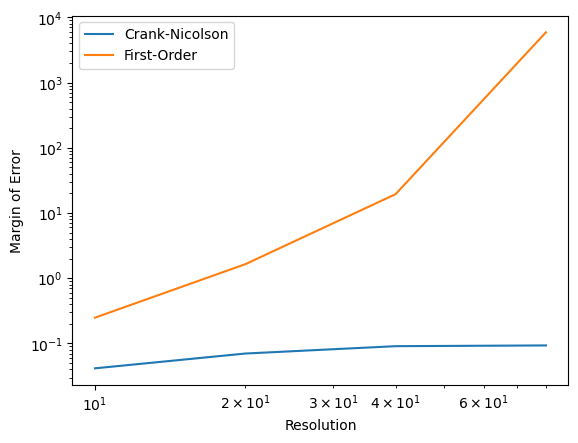

In [6]:
plt.figure()
plt.loglog(nx, errors_cn, label='Crank-Nicolson')
plt.loglog(nx, errors_fo, label='First-Order')
plt.xlabel('Resolution')
plt.ylabel('Margin of Error')
plt.legend()
plt.show()

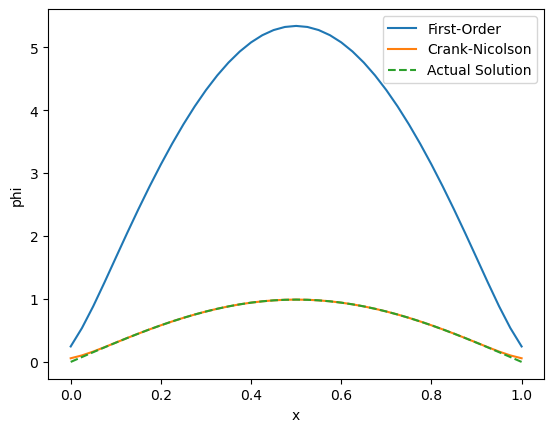

In [7]:
res = 40 
dx = 1 / res
x = np.linspace(0, 1, res + 1)
dt = dx**2 / k / 10

phi_actual = np.sin(np.pi * x) * np.exp(-np.pi**2 * k * t_max)
phi_cn = cranknic_dir(k, dx, dt, x, t_max)
phi_fo = first_order_dir(k, dx, dt, x, t_max)

plt.figure()
plt.plot(x, phi_fo, label='First-Order')
plt.plot(x, phi_cn, label='Crank-Nicolson')
plt.plot(x, phi_actual, label='Actual Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('phi')
plt.legend()
plt.show()

As we can see, the Crank-Nicolson Method follows the exact solution much closer and converges to a much smaller margin of error as opposed to first order direct.

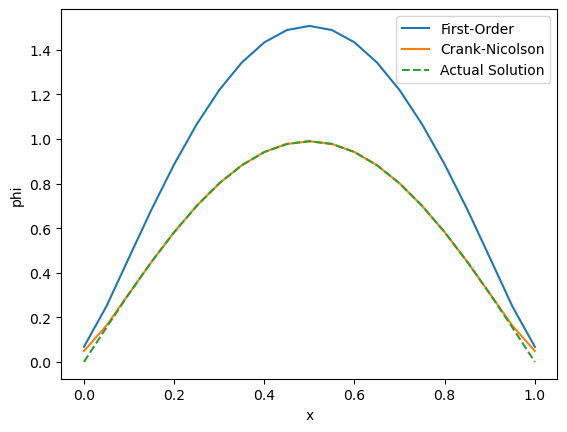

In [8]:
res = 20
dx = 1 / res
x = np.linspace(0, 1, res + 1)
dt = dx**2 / k / 10

phi_actual = np.sin(np.pi * x) * np.exp(-np.pi**2 * k * t_max)
phi_cn = cranknic_dir(k, dx, dt, x, t_max)
phi_fo = first_order_dir(k, dx, dt, x, t_max)

plt.figure()
plt.plot(x, phi_fo, label='First-Order')
plt.plot(x, phi_cn, label='Crank-Nicolson')
plt.plot(x, phi_actual, label='Actual Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('phi')
plt.legend()
plt.show()

Even at half the resolution (res = 20), the Crank-Nicolson, is still tight to the actual solution line and much more precise than first order direct.